In [18]:
#1. (age: age in years)                                  #category= sex, cp, fbs,restecg,exang,slope,ca, thal
#2. (sex:: 1 = male; 0 = female)

#3 (cp:: cp: chest pain type
#-- Value 1: typical angina
#-- Value 2: atypical angina
#-- Value 3: non-anginal pain
#-- Value 4: asymptomatic)

#4 (trestbps: resting blood pressure (in mm Hg on admission to the hospital))
#5 (chol: serum cholestoral in mg/dl)
#6 (fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false))

#7 (restecg: resting electrocardiographic results
#-- Value 0: normal
#-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
#-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria)

#8 ( thalach: maximum heart rate achieved)
#9 (exang: exercise induced angina (1 = yes; 0 = no))
#10 (oldpeak = ST depression induced by exercise relative to rest)

#11 slope: the slope of the peak exercise ST segment
#-- Value 1: upsloping
#-- Value 2: flat
#-- Value 3: downsloping

#12 ( ca: number of major vessels (0-3) colored by flourosopy)

#13 ( thal: 3 = normal; 6 = fixed defect; 7 = reversable defect)

#14 (num) (the predicted attribute)
# diagnosis of heart disease (angiographic disease status)
#-- Value 0: < 50% diameter narrowing
#-- Value 1: > 50% diameter narrowing



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:

import pandas as pd
address="C:/Users/ANTHONY/Desktop/CSV&XLSX/processed.cleveland.data"

header_list = ["Age", "Sex", "cp","trestbps", "chol", "fbs","restecg", "thalach", "exang","oldpeak", "slope", "ca","thal", "presence",]
df = pd.read_csv(address, names=header_list)
df

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


DATA PREPROCESSING

In [4]:
df.dtypes # ca and thal is object which is string type

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
presence      int64
dtype: object

In [8]:
df[df.isnull().any(axis=1)]          #displaying rows with nan values----> which shows none are having NAN values

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence


In [4]:
df.groupby('presence').mean()


,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
presence,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537
1,55.381818,0.836364,3.345455,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.636364
2,58.027778,0.805556,3.750000,134.194444,259.277778,0.250000,0.916667,135.583333,0.611111,1.780556,1.888889
3,56.000000,0.800000,3.771429,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.971429
4,59.692308,0.846154,3.692308,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,2.076923


In [10]:
dfnum = df.apply(pd.to_numeric, errors='coerce')
dfnum

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [11]:
dfnum.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
presence      int64
dtype: object

In [15]:
dfnum['presence'].mask(df['presence'] > 0, 1, inplace=True)
dfnum

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [16]:
dfnum.groupby('presence').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
presence,,,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537,0.273292,3.797546
1,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338,1.137681,5.840580


In [17]:
dfnum[dfnum.isnull().any(axis=1)] 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,1
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [20]:
dfnum_=dfnum.dropna()
dfnum_

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,presence
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


In [ ]:
WE ARE CROSSTABING CA CAUSE ITS CATEGORICAL

<AxesSubplot:xlabel='ca'>

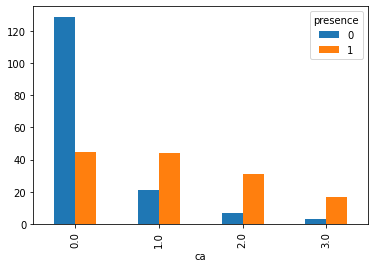

In [24]:
dfcros=pd.crosstab(dfnum_.ca,dfnum_.presence)   

#people with ca as zero dont have heart conftions...whereas people with 1,2,3 have heart condtions
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='thal'>

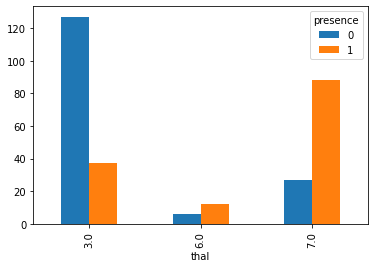

In [30]:
dfcros=pd.crosstab(dfnum_.thal,dfnum_.presence)   
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
#people with thal=7  have higher chance of heart conftions...
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='sex'>

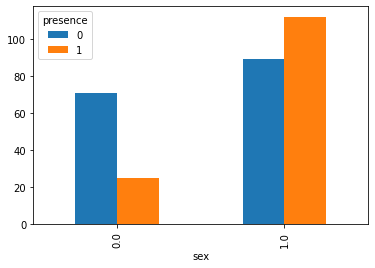

In [26]:
dfcros=pd.crosstab(dfnum_.sex,dfnum_.presence)   

#more men have heart condtions compared to females
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='fbs'>

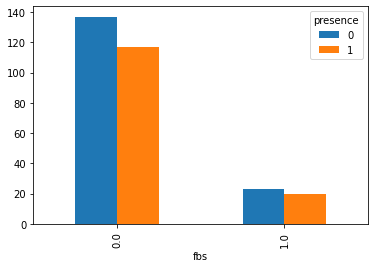

In [27]:
dfcros=pd.crosstab(dfnum_.fbs,dfnum_.presence)   
#not able to make much difference in levels for people whos fasting blood sugar is less than 120 
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='exang'>

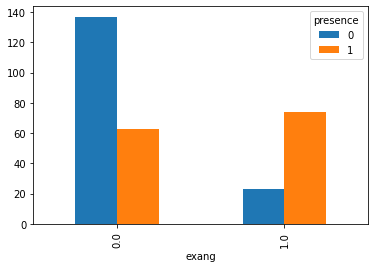

In [28]:
dfcros=pd.crosstab(dfnum_.exang,dfnum_.presence)   
#people with exang are more likely to get heart condtiitons 
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='cp'>

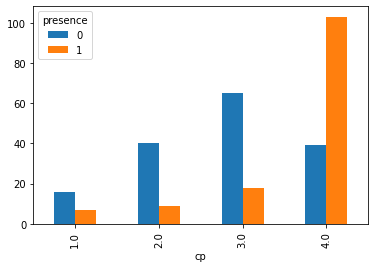

In [29]:
dfcros=pd.crosstab(dfnum_.cp,dfnum_.presence) 
#people with asymptomatic(4) chest pain haev higher chances of heart conditions
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='slope'>

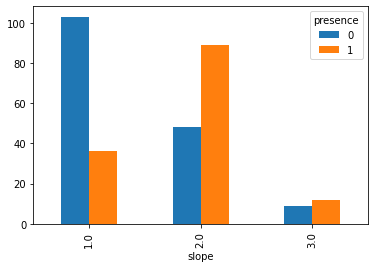

In [31]:
dfcros=pd.crosstab(dfnum_.slope,dfnum_.presence) 
#people with slope 1 have lesser chances of heart condition, and people with slope 2 have higher chance of heart condtition
dfcros.plot(kind='bar')

<AxesSubplot:xlabel='restecg'>

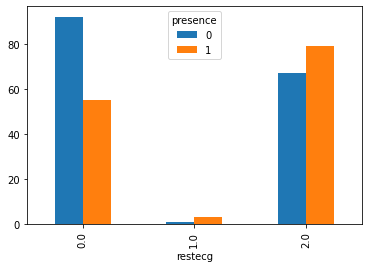

In [32]:
dfcros=pd.crosstab(dfnum_.restecg,dfnum_.presence) 
#people with 1 and 2 restecg have slightly higher chances of heart condtion
dfcros.plot(kind='bar')

In [33]:
#WE CAN SKIP FBS

In [35]:
#category= sex, cp, fbs,restecg,exang,slope,ca, thal

dfdf=dfnum_[["sex","cp","restecg","exang","slope","ca","thal"]]
dfdf

,sex,cp,restecg,exang,slope,ca,thal
0,1.0,1.0,2.0,0.0,3.0,0.0,6.0
1,1.0,4.0,2.0,1.0,2.0,3.0,3.0
2,1.0,4.0,2.0,1.0,2.0,2.0,7.0
3,1.0,3.0,0.0,0.0,3.0,0.0,3.0
4,0.0,2.0,2.0,0.0,1.0,0.0,3.0
...,...,...,...,...,...,...,...
297,0.0,4.0,0.0,1.0,2.0,0.0,7.0
298,1.0,1.0,0.0,0.0,2.0,0.0,7.0
299,1.0,4.0,0.0,0.0,2.0,2.0,7.0
300,1.0,4.0,0.0,1.0,2.0,1.0,7.0


HOT ENCODING / GETTING DUMMIES TO CATEGORICAL VALUES SO THAT IT CAN BE FIT TO PCA OR A MODEL

In [79]:
#categorical data
categorical_cols = ["sex","cp","restecg","exang","slope","ca","thal"] 

#import pandas as pd
dfd = pd.get_dummies(dfnum_, columns = categorical_cols)
y = dfd.presence
dfd_nopresence=dfd.drop(['presence'], axis = 1) 
dfd_nopresence

,age,trestbps,chol,fbs,thalach,oldpeak,sex_0.0,sex_1.0,cp_1.0,cp_2.0,...,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,145.0,233.0,1.0,150.0,2.3,0,1,1,0,...,0,0,1,1,0,0,0,0,1,0
1,67.0,160.0,286.0,0.0,108.0,1.5,0,1,0,0,...,0,1,0,0,0,0,1,1,0,0
2,67.0,120.0,229.0,0.0,129.0,2.6,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
3,37.0,130.0,250.0,0.0,187.0,3.5,0,1,0,0,...,0,0,1,1,0,0,0,1,0,0
4,41.0,130.0,204.0,0.0,172.0,1.4,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,140.0,241.0,0.0,123.0,0.2,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
298,45.0,110.0,264.0,0.0,132.0,1.2,0,1,1,0,...,0,1,0,1,0,0,0,0,0,1
299,68.0,144.0,193.0,1.0,141.0,3.4,0,1,0,0,...,0,1,0,0,0,1,0,0,0,1
300,57.0,130.0,131.0,0.0,115.0,1.2,0,1,0,0,...,0,1,0,0,1,0,0,0,0,1


WE NEED TO STANDARDIZE THE VALUES BEFORE PCA

In [81]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(dfd_nopresence)
scaled_data=scaler.transform(dfd_nopresence)
scaled_data


array([[ 0.93618065,  0.75038004, -0.27644339, ..., -1.11044257,
         3.93700394, -0.79490133],
       [ 1.3789285 ,  1.59626645,  0.74455507, ...,  0.90054184,
        -0.25400025, -0.79490133],
       [ 1.3789285 , -0.65943064, -0.35349988, ..., -1.11044257,
        -0.25400025,  1.25801776],
       ...,
       [ 1.48961547,  0.69398761, -1.04700826, ..., -1.11044257,
        -0.25400025,  1.25801776],
       [ 0.27205887, -0.09550637, -2.24138382, ..., -1.11044257,
        -0.25400025,  1.25801776],
       [ 0.27205887, -0.09550637, -0.21865103, ...,  0.90054184,
        -0.25400025, -0.79490133]])

In [82]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)
x_pca

array([[ 0.92946284, -0.01747221],
       [ 3.35993308,  1.75101902],
       [ 4.20936542,  0.08721653],
       [-1.70229547, -1.21434869],
       [-3.09379048,  1.05396937],
       [-2.91011709, -1.64552542],
       [ 0.78597223,  3.17310032],
       [-0.9093084 ,  1.17931565],
       [ 2.30659494, -0.10918945],
       [ 2.85561056, -0.89875969],
       [ 0.62191408, -1.2560952 ],
       [-1.43148268,  2.72456513],
       [ 2.36429354,  0.0679899 ],
       [-2.06679175, -2.84291512],
       [-1.19918437, -1.89022215],
       [-2.39110235, -1.2372869 ],
       [-0.9523983 , -2.57373261],
       [-1.44330723, -1.15227743],
       [-3.09032775,  1.01222235],
       [-2.92715655, -1.5878992 ],
       [ 1.11486847,  0.20189003],
       [-2.0218238 ,  2.37512838],
       [-0.85698299,  0.43376784],
       [ 0.43019496, -0.58964705],
       [ 4.02847223, -0.15594696],
       [-2.00262962,  1.34594984],
       [-3.36380367,  1.34883769],
       [-0.67987331,  1.86938577],
       [-1.65819601,

In [83]:
scaled_data.shape
x_pca.shape


(297, 2)

Text(0, 0.5, 'Second principle component')

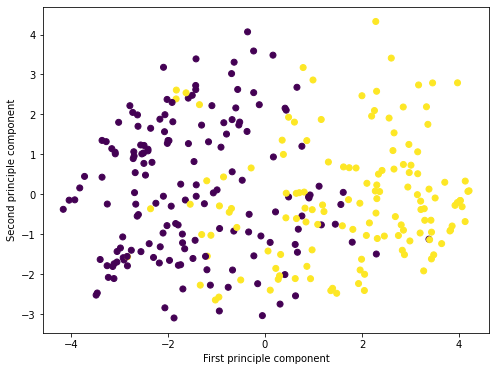

In [84]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dfd['presence'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

Text(0, 0.5, 'Second principle component')

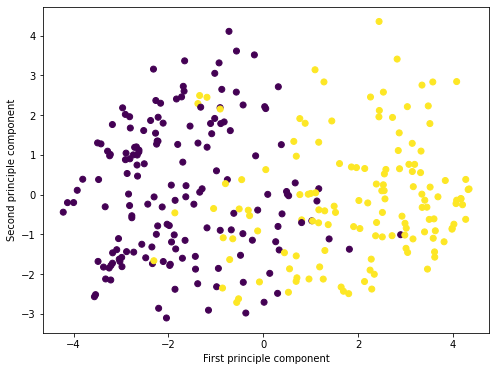

In [71]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dfd['presence'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

LOGISTIC REGRESSION

In [85]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [86]:
X=dfd_nopresence

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3)


In [87]:
model.fit(X_train, y_train)


C:\Users\ANTHONY\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [88]:
model.predict(X_test)


array([0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0], dtype=int64)

In [89]:
model.score(X_test,y_test)


0.8028846153846154